# 2022 NZMSA Data Science Submission.

In [600]:
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

%matplotlib inline

# EDA

In [601]:
dataset = pd.read_csv("weather-data.csv")
#dataset.head() # Show the first five results.

In [602]:
'''
Display average, standard deviation and percentile range (25th and 75th).
'''
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [603]:
# Display length and data types for the different columns in the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


In [604]:
# convert valid column datatype to datetime for more functionality
dataset['valid'] = pd.to_datetime(dataset['valid'])
# Set valid column to index for making plotting easier
dataset = dataset.set_index('valid')
#dataset.info()
dataset.head()


,station,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
valid,,,,,,,
2015-01-01 00:00:00,NZAA,21.0,11.0,52.77,15.0,NaN,NaN
2015-01-01 00:30:00,NZAA,21.0,10.0,49.37,16.0,NaN,NaN
2015-01-01 01:00:00,NZAA,21.0,12.0,56.38,16.0,NaN,NaN
2015-01-01 01:30:00,NZAA,21.0,13.0,60.21,16.0,NaN,NaN
2015-01-01 02:00:00,NZAA,21.0,12.0,56.38,16.0,NaN,NaN


In [605]:
# Find incomplete data
dataset.isnull().sum()

 station               0
tmpc                  35
dwpc                  35
relh                 120
sknt                   9
gust              102510
peak_wind_drct    103713
dtype: int64

<AxesSubplot:>

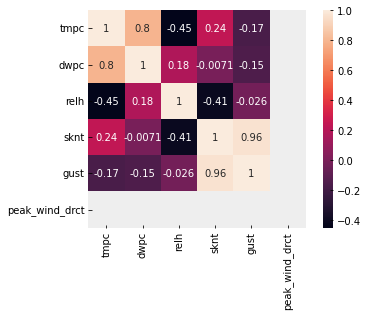

In [606]:
# Correlation Plot
sns.heatmap(dataset.corr(), annot=True, square=True)

In [607]:
print ()

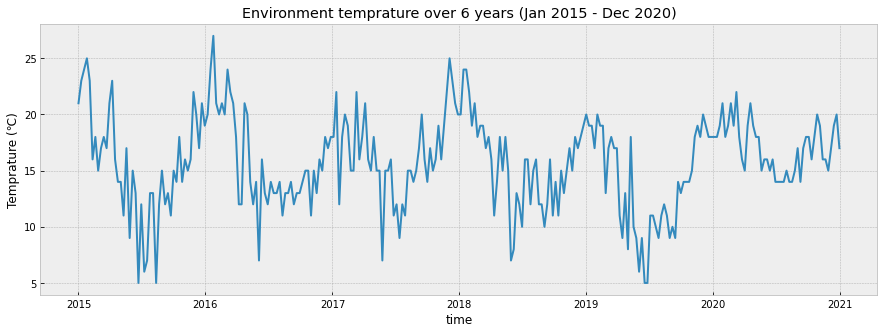

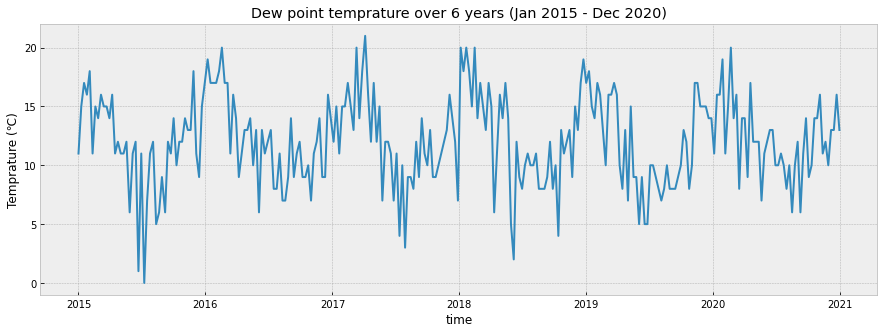

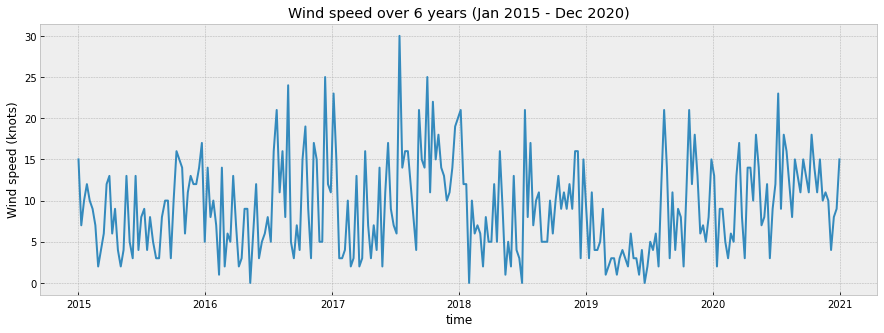

In [608]:
# Modfiy data to only consider every 8th midnight data point to save compute time
data_for_plotting = dataset[::384] # 48 X .5 = 24 hours and 48 X 2 X 2 X 2 = 384 (.5 hours) = 8 days

## Temprature vs time Graph
# Plot style and sizing
plt.style.use("bmh")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

# Setting up plot for temprature data over time
plt.plot(data_for_plotting['tmpc'])
plt.title('Environment temprature over 6 years (Jan 2015 - Dec 2020)')
plt.xlabel('time')
plt.ylabel('Temprature (℃)')
# Show plot
plt.show()

## Dew point temprature vs time graph
# Plot style and sizing
plt.style.use("bmh")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

# Setting up plot for dew point temprature data over time
plt.plot(data_for_plotting['dwpc'])
plt.title('Dew point temprature over 6 years (Jan 2015 - Dec 2020)')
plt.xlabel('time')
plt.ylabel('Temprature (℃)')
# Show plot
plt.show()

## Wind speed vs time graph
# Plot style and sizing
plt.style.use("bmh")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

# Setting up plot for dew point temprature data over time
plt.plot(data_for_plotting['sknt'])
plt.title('Wind speed over 6 years (Jan 2015 - Dec 2020)')
plt.xlabel('time')
plt.ylabel('Wind speed (knots)')
# Show plot
plt.show()

## Comments on the dataset after performing EDA
* Data is quite big and needs a big plot to accuratly plot all data points. Thinning down the data by considering data collected every midnight and making graph wider has helped solve this.
* The correlation plot (sns heatmap) indicates a strong relationship between environment temprature and environment dew point temprature.
* The numerical section plots display proportionality between environment temprature and environment dew point temprature. Evident by the similar sinusoidal wave pattern in both plots.
* tmpc, dwpc, relh, sknt, gust and peak_wind_drct columns have missing data. Indicated by .isnull().any() method performed on dataset

# Data Processing

In [609]:
# Create dataset copy
updt_dataset = dataset.copy()

# delete all columns except valid and tmpc as I will use those later
updt_dataset = updt_dataset.drop(columns=[' station', 'dwpc', 'relh', 'sknt', 'gust', 'peak_wind_drct'], axis=1)

In [610]:
# Check for missing data (will show True if any)
updt_dataset.isnull().any()


tmpc    True
dtype: bool

In [611]:
# replacing missing values with mean of column
updt_dataset = updt_dataset.fillna(updt_dataset.mean())
#updt_dataset.dropna()

#updt_dataset['tmpc'] = updt_dataset['tmpc'].fillna(dataset['tmpc'].mean())
#updt_dataset['dwpc'] = updt_dataset['dwpc'].fillna(dataset['dwpc'].mean())
#updt_dataset['sknt'] = updt_dataset['sknt'].fillna(dataset['sknt'].mean())

updt_dataset.isnull().sum()
#print (updt_dataset)

tmpc    0
dtype: int64

In [612]:
# Create X data with numeric values as current valid data column is of datetime type
x = [x for x in range(len(updt_dataset.index))]
x = pd.DataFrame(x)
#print (x, updt_dataset['tmpc'])
#print (len(x), updt_dataset['tmpc'].shape)#


In [613]:
'''
Splitting data into train and test sets
    - using shuffle=False to make it easier to seperate last month as a test set
'''
#print (dataset['tmpc'].shape, dataset['dwpc'].shape)
#x_train, x_test, y_train, y_test = train_test_split(x, updt_dataset['tmpc'], test_size=0.2, random_state=10)
x_train, x_test, y_train, y_test = train_test_split(x, updt_dataset['tmpc'], test_size=0.2, random_state=10, shuffle=False)

# Data Modelling

In [614]:
# Using selected model to fit data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

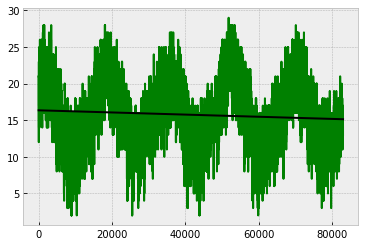

In [615]:
# Visualising model fit on training data
plt.plot(x_train, y_train, color='g')
plt.plot(x_train, model.predict(x_train), color='k')
plt.show()

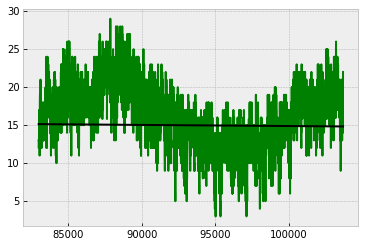

R-squared: -0.06152716125868518


In [616]:
# Visualising model fit on test data
plt.plot(x_test, y_test, color='g')
plt.plot(x_test, model.predict(x_test), color='k')
plt.show()

# Score test data
score = model.score(x_test, y_test)
print("R-squared:", score)

In [617]:
'''
Create test set for January 2021 (31 days)
    - last x value from dataset = 103713. x_test would range from 
        103713 to 105201 (103713 + 31days*24hours*2(for number of half hours in a month)
'''
x_future_test = [x for x in range(103713, 105201 + 1)]
x_future_test = pd.DataFrame(x_test)

In [618]:
# Predict temprature for future month (2021 Jan)
#score = model.score(x_test, model.predict(x_test))
#print("R-squared:", score)
model.predict(x_test)

array([15.13821759, 15.13820289, 15.13818818, ..., 14.8332558 ,
       14.83324109, 14.83322639])

# Model Evalutation


# Conclusion
* In future, will need find a better model to fit the data.
## Model Performance
* Model underfit the training data. This is evident looking at the visual graph.

## Observations
* Test score was very low. Indicated by the low r squared value.
* Low test score would mean the future predictions from the model would be unrealiable.